# Usina_termoeletrica_regressor
Projeto de Data science usando regressão para prever a saída de energia elétrica horária líquida (MWh).

Combined cycle power plant
O dataset contém 9568 registros coletados de uma usina termelétrica de ciclo combinado ao longo de 6 anos (2006-2011). É composto pelas seguintes variáveis médias horárias: Temperatura (T), Pressão Ambiente (AP), Umidade Relativa (RH) e Vácuo de Exaustão (V); usadas para prever a saída de energia elétrica horária líquida (EP) da planta. Uma usina termelétrica de ciclo combinado combina o uso de dois sistemas de turbina, uma turbina a gás que queima combustível para gerar eletricidade e uma turbina a vapor que produz eletricidade adicional usando o vapor obtido do calor de exaustão da turbina a gás. O calor de exaustão da turbina a gás é convertido em vapor, que é canalizado para a turbina a vapor para geração adicional de energia elétrica.

Objetivo: prever a saída de energia elétrica horária líquida (MW) a partir das variáveis de entrada.


Descrição das variáveis:

Temperatura (AT) na faixa de 1,81 ° C e 37,11 ° C;
Pressão ambiente (AP) na faixa de 992,89-1033,30 milibar;
Umidade relativa (RH) na faixa de 25,56% a 100,16%;
Vácuo de exaustão (V) na faixa de 25,36-81,56 cm Hg
Produção horária líquida de energia elétrica (PE) 420,26-495,76 MW. As médias foram tiradas de vários sensores localizados ao redor da planta que registram as variáveis ambientais a cada segundo. As variáveis são fornecidas sem normalização.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import PolynomialFeatures

In [97]:
import mlflow
from mlflow.models.signature import infer_signature

In [98]:
mlflow.set_experiment("Usina")

In [100]:
mlflow.start_run()

Exception: Run with UUID f6bb99b8641f4fbe9d9647176a1c911e is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [12]:
df = pd.read_csv('C:/Users/ewert/Desktop/Usina_termoeletrica_regressor/data/ccppa.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [16]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [18]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


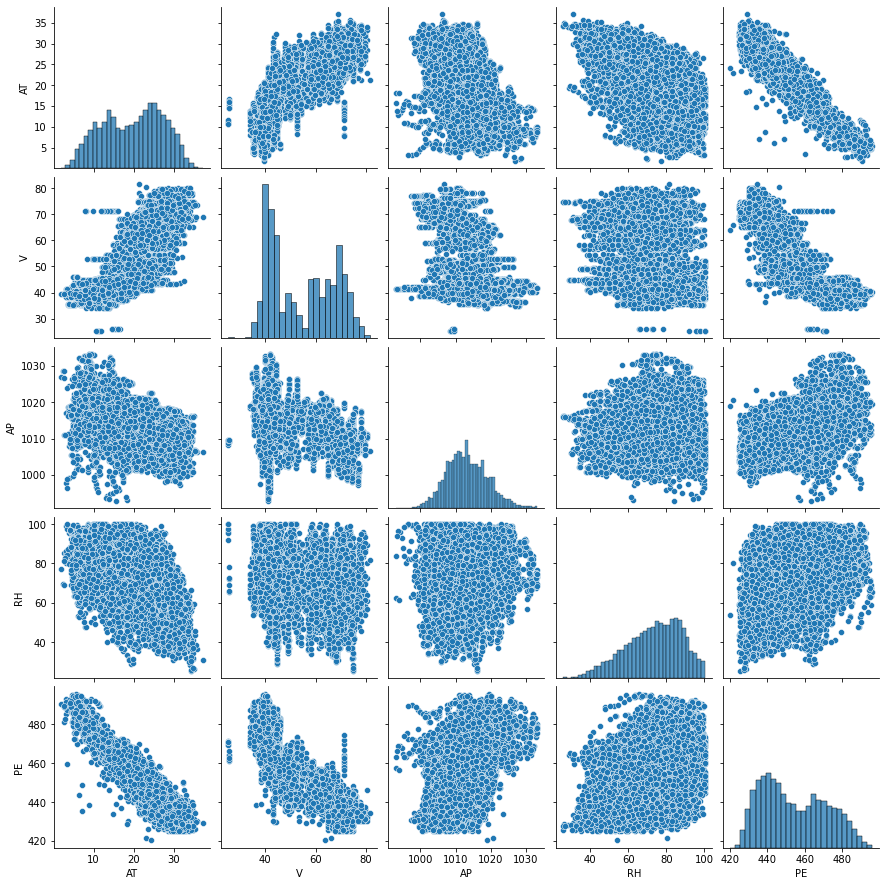

In [49]:
sns.pairplot(df, diag_kind='hist')
plt.savefig('mlruns/pairplot.png')
mlflow.log_artifact('mlruns/pairplot.png')


In [50]:
plt.close()

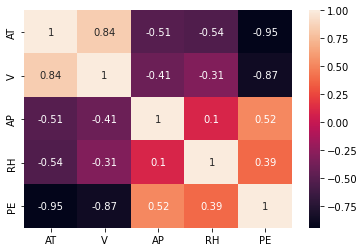

In [51]:
sns.heatmap(df.corr(), annot=True)
plt.savefig('mlruns/heatmap.png')
mlflow.log_artifact('mlruns/heatmap.png')

In [52]:
plt.close()

In [101]:
X = df.drop(['PE'], axis=1)
y = df['PE']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [103]:
pipeline = Pipeline(
    steps = [  
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('polynomial', PolynomialFeatures(degree=4)),
        ('linear_regressor', LinearRegression())
    ]
)

In [104]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('polynomial', PolynomialFeatures(degree=4)),
                ('linear_regressor', LinearRegression())])

In [105]:
y_pred_test = pipeline.predict(X_test)

In [106]:
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(mse)
print(r2)

15.980969616649435
0.9441506285701794


In [107]:
mlflow.log_metric('MSE test', mse)
mlflow.log_metric('r2 test', r2)

In [108]:
y_pred_train = pipeline.predict(X_train)

In [109]:
r2 = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
print(mse)
print(r2)

16.90056329581255
0.9422246360908528


In [110]:
mlflow.log_metric('MSE train', mse)
mlflow.log_metric('R2 train', r2)

In [111]:
params = pipeline.named_steps['linear_regressor'].get_params()

In [112]:
mlflow.log_params(params)

In [113]:
signature = infer_signature(X_test, y_pred_test)

In [114]:
mlflow.sklearn.log_model(pipeline, 'model_pipeline', signature=signature)

In [115]:
mlflow.end_run()

In [116]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.R2 train,metrics.MSE test,metrics.MSE train,metrics.r2 test,params.positive,params.copy_X,params.fit_intercept,params.normalize,params.n_jobs,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.log-model.history
0,f6bb99b8641f4fbe9d9647176a1c911e,1,FINISHED,file:///C:/Users/ewert/Desktop/Usina_termoelet...,2022-08-31 03:27:05.602000+00:00,2022-08-31 03:43:32.605000+00:00,0.942225,15.98097,16.900563,0.944151,False,True,True,deprecated,None,C:\Users\ewert\AppData\Roaming\Python\Python39...,ewert,LOCAL,"[{""run_id"": ""f6bb99b8641f4fbe9d9647176a1c911e""..."


In [122]:
last_run = dict(mlflow.search_runs().sort_values(by='start_time', ascending=False).iloc[0])

In [123]:
artifact_uri = last_run['artifact_uri']

In [125]:
model = mlflow.sklearn.load_model(artifact_uri+'/model_pipeline')

In [126]:
model.predict(X_test)

array([435.50780892, 436.09014102, 460.29913043, ..., 467.21268201,
       433.61666731, 456.71661543])